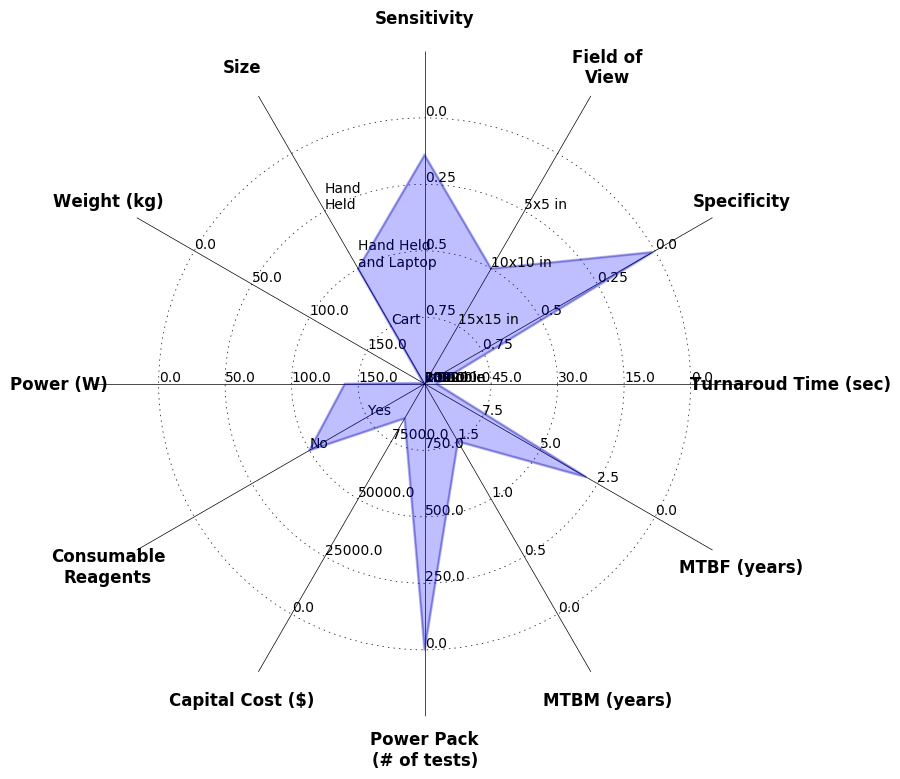

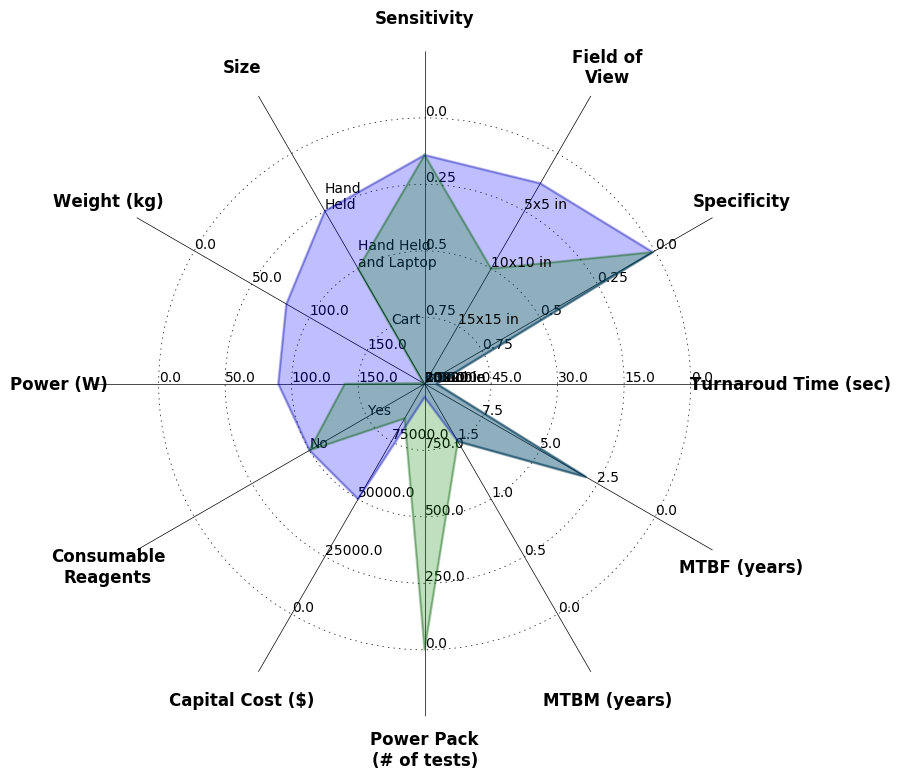

In [7]:
'''
This function will develop the axis properties for a "spyder" chart with varying axis dimensions.  This is useful in
comparing the qualities of various items, such as medical diagnostic devices.  In general, a smaller "footprint" indicates
better qualities.
'''

import numpy as np
import pylab as plt
import matplotlib.pyplot as py

def productFootprint(categories, ranges, product, data, overlap = 'no'):
    rect = [0.05, 0.05, 0.95, 0.95]

    n = len(categories)
    angles = [a if a <=360. else a - 360. for a in np.arange(90, 90+360, 360.0/n)]
    axes = [fig.add_axes(rect, projection="polar", label="axes%d" % i) for i in range(n)]

    ax = axes[0]
    ax.set_thetagrids(angles, labels=categories, fontsize=12, weight="bold", color="black")

    for ax in axes[1:]:
        ax.patch.set_visible(False)
        ax.grid("on")
        ax.xaxis.set_visible(False)
        ax.yaxis.grid(False)

    for ax, angle, tickValue in zip(axes, angles, ranges):
        ax.set_rgrids(np.arange(1.0, 6.0, 1.0), labels=tickValue, angle=angle, fontsize=10)
        ax.spines["polar"].set_visible(False)
        ax.set_ylim(1, 6)
        ax.xaxis.grid(True,color='black',linestyle='-')
    
    if overlap == 'no':
        angle = np.deg2rad(np.r_[angles, angles[0]])
        values = np.r_[data, data[0]]
        ax.plot(angle, values, "-", lw=2, color="b", alpha=0.25, label=product)
        ax.fill(angle, values, facecolor='b', alpha=0.25)

    elif overlap == 'yes':
        for instrumet,metrics in zip(product, data):
            angle = np.deg2rad(np.r_[angles, angles[0]])
            values = np.r_[metrics, metrics[0]]
            ax.plot(angle, values, "-", lw=2, alpha=0.25, label=instrumet)
            ax.fill(angle, values, alpha=0.25)
    
    else:
        print "enter yes or no for overlap"

def reverseOrder(myRange): 
    # funciton to reverse the order of a range if you desire to flip an axis
    return myRange[::-1]

def dataGen():
    performanceMets = [  'Sensitivity',

                         'Size',
                         'Weight (kg)',
                         'Power (W)',
                         'Consumable\nReagents',

                         'Capital Cost ($)',

                         'Power Pack\n(# of tests)',
                         'MTBM (years)',
                         'MTBF (years)',

                         'Turnaroud Time (sec)',
                         'Specificity',
                         'Field of\nView'
             ]

    ranges = [np.arange(0.0, 1.25, 0.25),

              ('', 'Hand\nHeld', 'Hand Held\nand Laptop', 'Cart', 'Immoble'),
              np.arange(0.0, 250, 50.0), # 1 kg to 125 kg (~260 lb)
              np.arange(0.0, 250, 50.0), 
              ('', '', 'No', 'Yes', ''), 

              np.arange(0.0, 125000, 25000),

              np.arange(0.0, 1250.0, 250.0),
              np.arange(0.0, 2.5, 0.50),
              np.arange(0.0, 12.5, 2.5),

              np.arange(0.0, 75.0, 15.0),
              np.arange(0.0, 1.25, 0.25),
              ('','5x5 in', '10x10 in', '15x15 in', '20x20 in')
             ]

    devices = {'DeepView: Proposed Device':     [4.44, 3, 1.02, 2.2, 3, 1.6, 5.0, 2.0, 3.8, 1.18, 4.96, 3.00],
               'DeepView: Current Generation':  [4.44, 4, 3.40, 3.2, 3, 3.0, 1.2, 2.0, 3.8, 1.18, 4.96, 4.48],
               }
#                'Laser Doppler':                  [5, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 2]
#               }
            
    return performanceMets, ranges, devices

if __name__ == "__main__":

    performanceMets, ranges, devices = dataGen()

    reverseRange = []
    for aRange in ranges:
        reverseRange.append(reverseOrder(aRange))

    fig = plt.figure(figsize=(7, 7))
    productFootprint(performanceMets, reverseRange, devices.keys()[1], devices.values()[1])
    plt.ylim(1, 6)
    plt.show()

#     fig = py.gcf()
#     fig.set_size_inches(6, 6, forward=True)
#     fig.savefig('test2png.png', dpi=300, bbox_inches="tight", pad_inches=1)
    
    fig = plt.figure(figsize=(7, 7))
    productFootprint(performanceMets, reverseRange, devices.keys(), devices.values(), 'yes')
    plt.show()

#     fig = py.gcf()
#     fig.set_size_inches(6, 6, forward=True)
#     fig.savefig('test2png.png', dpi=300, bbox_inches="tight", pad_inches=1)

In [37]:
import sympy
M = np.array([[.9821, .0029],[ .0179, .9971]])
b = np.array([0,0])
PI = M-np.identity(2)
PI

array([[-0.0179,  0.0029],
       [ 0.0179, -0.0029]])

In [40]:
1./(1+(-PI[0,1]/PI[0,0]))

0.86057692307692335